Speedups:
1 processes: 1.0000x
2 processes: 1.5409x
4 processes: 2.9060x
8 processes: 4.3257x
16 processes: 0.7659x

Amdahl's Law - Estimated Parallel Fractions (P):
1 processes: P = 0.0000
2 processes: P = 0.7021
4 processes: P = 0.8745
8 processes: P = 0.8787
16 processes: P = -0.3260


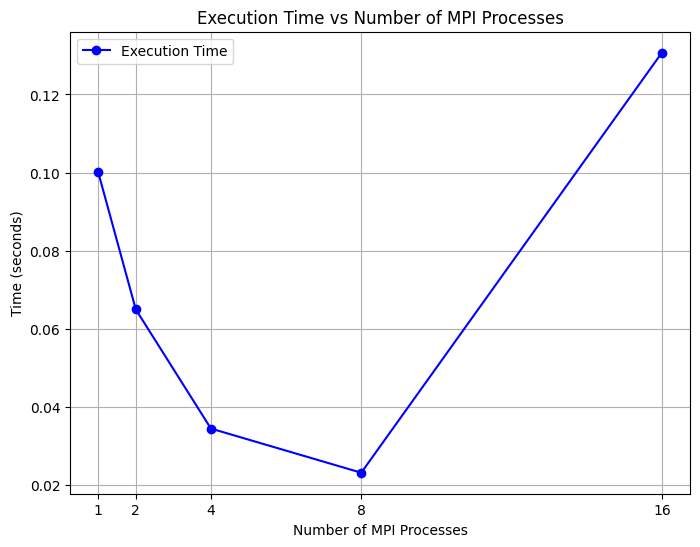

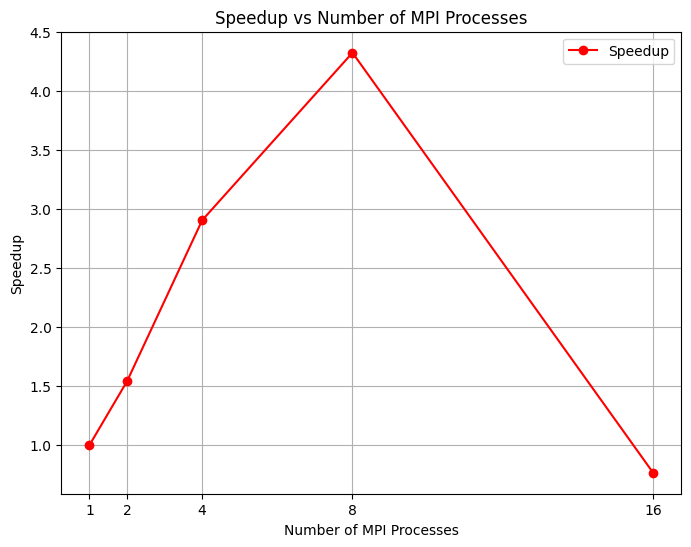

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data: Replace these with the actual times from your runs
np_processes = [1, 2, 4, 8, 16]
times = [0.100084, 0.064950, 0.034441, 0.023137, 0.130674]  # Use actual times for 64 processes

# Calculate speedup based on time with 1 process (the first element in `times`)
speedup = [times[0] / time if time is not None else None for time in times]

# Print speedups
print("Speedups:")
for p, s in zip(np_processes, speedup):
    print(f"{p} processes: {s:.4f}x")

# Apply Amdahl's Law to calculate parallel fraction P
# Amdahl's Law: P = (N * (S - 1)) / (S * (N - 1))
amdahl_p = []
print("\nAmdahl's Law - Estimated Parallel Fractions (P):")
for N, S in zip(np_processes, speedup):
    if N == 1 or S == 1:
        P = 0.0  # Can't compute meaningful P when N=1 or S=1
    else:
        P = (N * (S - 1)) / (S * (N - 1))
    amdahl_p.append(P)
    print(f"{N} processes: P = {P:.4f}")

# Plot 1: Execution Time vs Number of Processes
plt.figure(figsize=(8, 6))
plt.plot(np_processes, times, marker='o', linestyle='-', color='b', label="Execution Time")
plt.xlabel("Number of MPI Processes")
plt.ylabel("Time (seconds)")
plt.title("Execution Time vs Number of MPI Processes")
plt.grid(True)
plt.xticks(np_processes)
plt.legend()
plt.show()

# Plot 2: Speedup vs Number of Processes
plt.figure(figsize=(8, 6))
plt.plot(np_processes, speedup, marker='o', linestyle='-', color='r', label="Speedup")
plt.xlabel("Number of MPI Processes")
plt.ylabel("Speedup")
plt.title("Speedup vs Number of MPI Processes")
plt.grid(True)
plt.xticks(np_processes)
plt.legend()
plt.show()